# Brain Tumour Classification Using EfficientNetB0, ResNet50 and VGG16
<b>Overview</b>

This notebook is dedicated to the classification of brain tumours from MRI images into four specific categories: Glioma, Meningioma, No Tumor, and Pituitary. Leveraging the power of Pre-Trained Deep Learning models, this project aims to automate the process of tumor detection and classification, providing a crucial tool for early diagnosis and effective treatment planning.

<b>Objective</b>

This project aims to compare three state-of-the-art DL models which are able to classify MRI images into the foru defined categories to identify the ideal model for the task.

<b>What is a brain tumour?</b><br>
A brain tumour is a mass of abnormal cells that grows in the brain. It can be either cancerous or noncancerous. The tumour may cause an increase in pressure inside the skull, resulting in potential brain damage and life-threatening consequences.

<b>Dataset:</b> This dataset is a combination of the following three datasets;figshare, SARTAJ, and Br35H. This dataset contains 7023 images of human brain MRI images which are classified into 4 classes: glioma - meningioma - no tumor and pituitary.

<b>Description of Classes</b>
* **Glioma:** A type of tumour that arises from the glial cells in the brain. Gliomas can vary in severity and can be either benign or malignant.
* **Meningioma:** A usually benign tumour that develops in the meninges, which are the protective layers of tissue surrounding the brain and spinal cord.
* **No tumour:** This category refers to brain MRI images that do not show any evidence of a tumour or abnormal growth in the brain.
* **Pituitary:** This refers to conditions related to the pituitary gland, which is a small gland at the base of the brain that regulates various bodily functions through the production and release of hormones. Tumors can also develop in the pituitary gland.

<b>Methodology</b><br>
* <b>Data Analysis and Visualisation:</b> In this step the data is collected and the different directories are accessed to display the counts of classes in the dataset and some random images.
* <b>Data Preparation:</b> This stage involves preparing the data which is used for training and evaluating the Deep Learning models. First, the data is accessed from the different data paths into training lists with the class labels. Then the lists are converted into numpy arrays. Once hot-encoding is applied to them followed by splitting the training set into validation splits. Then the images are scaled and finally augmented.
* <b>Model Building and Evaluation:</b> In this stage the 3 different Deep Learning models are trained on the trained data and tested on the testing set. The models are evaluated by means of confusion metrics, accuracy scores and so on.
* **Conclusion and Future Work:** The ideal model for the classification of Brain Tumours has been identified and further extension of this project is recommended.

Libraries

In [ ]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Setting up grid and colour palette for data visualisation
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Ingore the warnings
import warnings
warnings.filterwarnings('ignore')

# DL Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0, ResNet50, VGG16
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#Image Generator DataAugmentation
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Other libraries
import os
import random

import cv2
from tqdm import tqdm
import io
from warnings import filterwarnings

2024-07-28 23:35:26.554694: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 23:35:26.554837: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 23:35:26.680067: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Constants
image_size = 128
batch_size = 16
num_classes = 4
epoch = 10

# Dictionary to store model evaluation results
results = { "Model": [], "Accuracy": [], "F1-Score": [], "Precision": [], "Recall": [] }

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## Data Analysis and Visualisation

In [ ]:
# Paths for directories
dataset_path = '/kaggle/input/brain-tumour-dataset/tumour_dataset'
train_path = '/kaggle/input/brain-tumour-dataset/tumour_dataset/Training'
test_path = '/kaggle/input/brain-tumour-dataset/tumour_dataset/Testing'

In [ ]:
# Data Inspection in the training directory
print("Images of Glioma, Meningioma, No Tumor, and Pituitary in the Training Directory:\n")

# Categories and initialing a dictionary to store the counts
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
counts = {}

# Looping through each category to get the count of images
for category in categories:
    category_path = os.path.join(train_path, category)
    counts[category] = len(os.listdir(category_path))

# Print the counts
for category, count in counts.items():
    print(f"{category.capitalize()} = {count}")
print("\n")

# Calculate and print the total number of images
total_train = sum(counts.values())
print("Total =", total_train)

Images of Glioma, Meningioma, No Tumor, and Pituitary in the Training Directory:

Glioma = 1321
Meningioma = 1339
Notumor = 1595
Pituitary = 1457


Total = 5712


In [ ]:
# Data Inspection in the testing directory
print("Images of Glioma, Meningioma, No Tumor, and Pituitary in the Testing Directory:\n")

# Categories and initialing a dictionary to store the counts
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
counts = {}

# Looping through each category to get the count of images
for category in categories:
    category_path = os.path.join(test_path, category)
    counts[category] = len(os.listdir(category_path))

# Print the counts
for category, count in counts.items():
    print(f"{category.capitalize()} = {count}")
print("\n")

# Calculate and print the total number of images
total_test = sum(counts.values())
print("Total =", total_test)

Images of Glioma, Meningioma, No Tumor, and Pituitary in the Testing Directory:

Glioma = 300
Meningioma = 306
Notumor = 405
Pituitary = 300


Total = 1311


In [ ]:
# Total images
print("Totla number of images =",total_train + total_test)

Totla number of images = 7023


The function counts the number of images per class in the training and testing datasets, combines these counts, and visualizes the class distribution using both a bar plot and a pie chart.

In [ ]:
def plot_class_distribution(train_path, test_path):
    def get_class_counts(dataset_path):
        class_counts = {}
        # Traverse through each subfolder (class)
        for class_name in os.listdir(dataset_path):
            class_path = os.path.join(dataset_path, class_name)
            if os.path.isdir(class_path):
                # Count the number of samples in each class
                num_samples = len(os.listdir(class_path))
                class_counts[class_name] = num_samples
        return class_counts

    # Get class counts for training and testing sets
    train_counts = get_class_counts(train_path)
    test_counts = get_class_counts(test_path)

    # Combine counts for total count
    total_counts = {class_name: train_counts.get(class_name, 0) + test_counts.get(class_name, 0)
                    for class_name in set(train_counts) | set(test_counts)}

    # Plot the class distribution (bar plot)
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.barplot(x=list(total_counts.keys()), y=list(total_counts.values()))
    plt.title('Distribution of Classes in the Dataset')
    plt.xlabel('')
    plt.ylabel('')

    # Plot the class distribution (pie chart)
    plt.subplot(1, 2, 2)
    plt.pie(total_counts.values(), labels=total_counts.keys(), autopct='%1.0f%%', startangle=140)
    plt.tight_layout()
    plt.show()

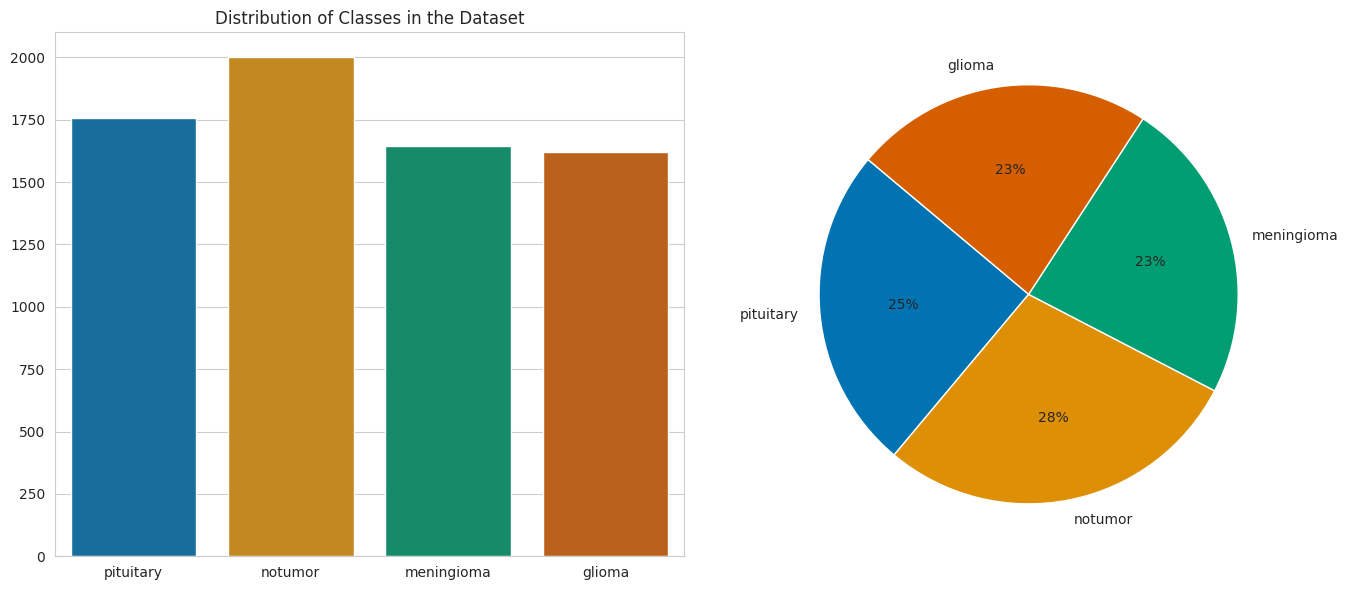

In [ ]:
plot_class_distribution(train_path, test_path)

The function selects a specified number of random images from a given directory and displays them in a grid format. This helps in quickly visualizing samples from a dataset.

In [ ]:
# Function to visualize random images from a directory
def visualize_random_images(directory, num_images=4):
    # Load image file paths
    image_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg')):
                image_paths.append(os.path.join(root, file))

    # Select random image paths
    random_paths = random.sample(image_paths, num_images)

    # Plot images
    plt.figure(figsize=(10, 10))
    for i, image_path in enumerate(random_paths):
        img = load_img(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(image_path))
        plt.axis('off')
    plt.show()

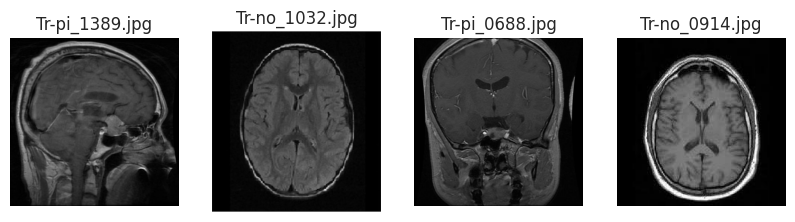

In [ ]:
visualize_random_images(train_path, num_images=4)

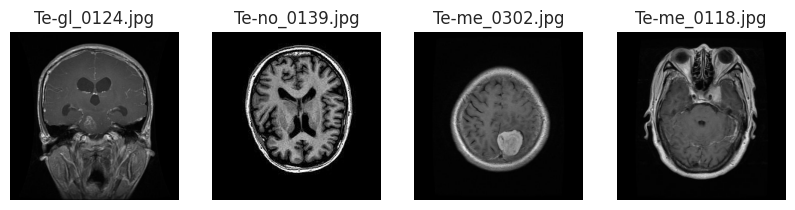

In [ ]:
visualize_random_images(test_path, num_images=4)

## Data Preparation

This function loads images from the specified data_path and processes them for Deep Learning. It takes two arguments:

* **data_path:**  The root directory where the images are stored.<br>
* __labels:__ The list of class names used to categorize the images.


__Functionality:__

* Initializes two lists: data for storing image arrays and targets for storing their corresponding labels.
* Loops through each label to access its respective folder.<br>
* Reads each image in the folder using OpenCV (cv2.imread).
* Resizes each image to a fixed size (image_size) for consistency using cv2.resize.
* Appends the image and its label to the data and targets lists respectively.
* Finally, converts these lists to numpy arrays and returns them.

In [ ]:
# Data Preparation
labels = ['glioma', 'notumor', 'meningioma', 'pituitary']

# Load data
def load_data(data_path, labels):
    data = []
    targets = []
    for label in labels:
        folder_path = os.path.join(data_path, label)
        for img_name in tqdm(os.listdir(folder_path)):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            data.append(img)
            targets.append(label)
    return np.array(data), np.array(targets)

In [ ]:
X_train, y_train = load_data(train_path, labels)
X_test, y_test = load_data(test_path, labels)

100%|██████████| 300/300 [00:02<00:00, 100.40it/s]


In [ ]:
# One-hot encoding
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [ ]:
# Split the training data into validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (5140, 128, 128, 3)
y_train shape: (5140, 4)
X_test shape: (1311, 128, 128, 3)
y_test shape: (1311, 4)
X_val shape: (572, 128, 128, 3)
y_val shape: (572, 4)


This function is designed to display a set of original images alongside their augmented versions.

__Function Purpose:__ Visualize the original and augmented versions of images to understand the effects of image augmentation techniques.

__Parameters:__
* __Image_generator:__ An object responsible for generating augmented images. It typically has methods like random_transform to apply different augmentations.
* __num_samples:__ Number of original images from the training set to be displayed.
* __num_augmented_images:__ Number of augmented versions to generate and display for each original image.

__Function Steps:__
* Initialize List: augmented_images is an empty list to store lists of augmented images for each sample.
* Generate Augmented Images: For each of the first num_samples images in X_train: Start with the original image and create a list augmented_samples.
* Generate num_augmented_images augmented versions of the original image using image_generator.random_transform.
* Append the original image and its augmented versions to augmented_images.

**Plotting:**

* Create a subplot grid where each row represents an original image and its augmented versions.
* Display each image in the grid: The first column shows the original image with the title "Original Image".
* Subsequent columns show augmented images with titles like "Augmented Image 1", "Augmented Image 2", etc.
* Turn off axis labels for a cleaner look.
* Show Plot: Adjust the layout and display the plot using plt.show().

In [ ]:
def visualize_augmented_images(image_generator, num_samples, num_augmented_images):
    augmented_images = []
    for sample in X_train[:num_samples]:

        # Create a list to store augmented versions of a sample
        augmented_samples = [sample]
        for _ in range(num_augmented_images):
            augmented_samples.append(image_generator.random_transform(sample))
        augmented_images.append(augmented_samples)

    # Plot original and augmented images
    fig, axes = plt.subplots(num_samples, num_augmented_images + 1, figsize=( 12, num_samples * 3))
    for i, sample in enumerate(augmented_images):
        for j, image in enumerate(sample):
            axes[i,j].imshow(image)
            if j == 0:
                axes[i, j].set_title('Original Image')
            else:
                axes[i,j].set_title(f'Augmented Image {j}')
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

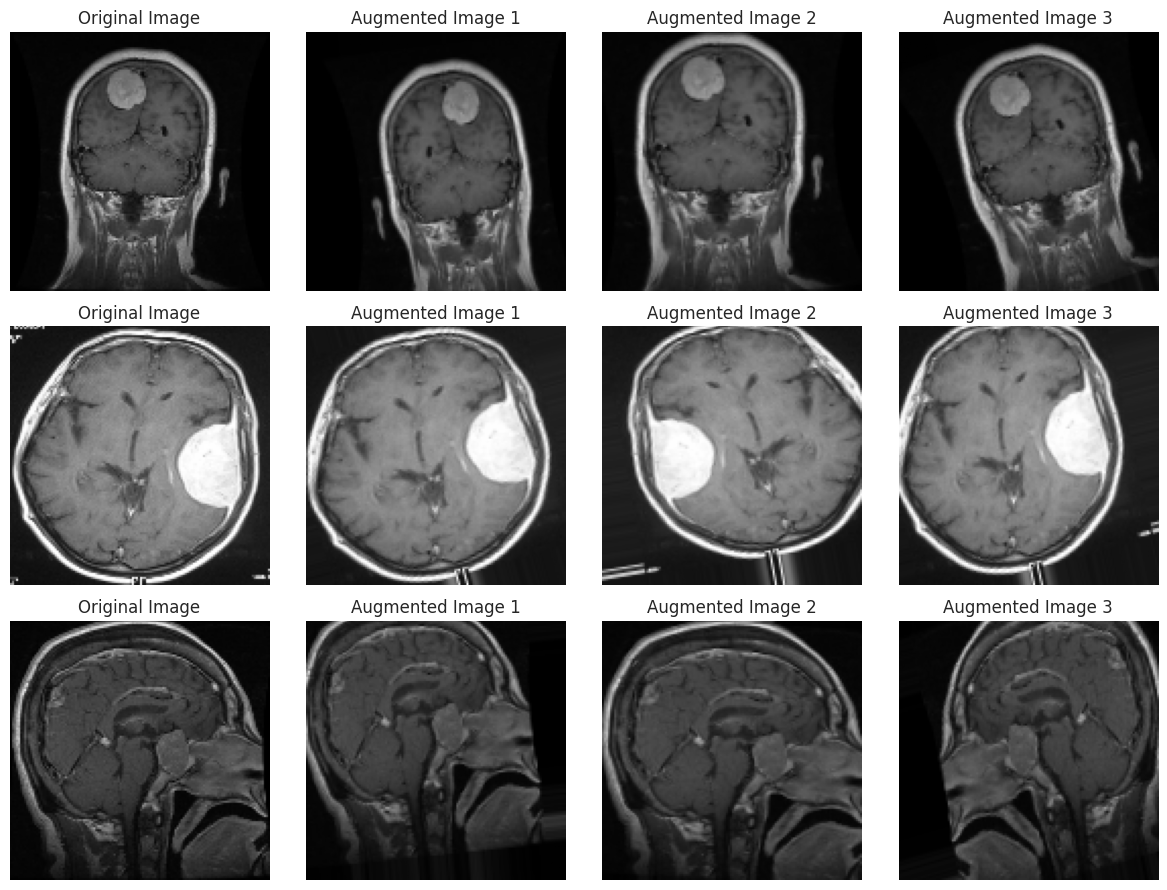

In [ ]:
#Visualize augmented images to see how it works
visualize_augmented_images(datagen, num_samples=3, num_augmented_images=3)

## Model Training and Evaluation

The following function is used to construct a neural network model based on a pre-trained base model.

__Function Purpose:__ Create a custom neural network model by adding additional layers to a pre-trained base model, adapting it for a specific classification task.

**Parameters:**
* __base_model:__ A pre-trained model (for this project EfficientNetB0, ResNet50 and VGG16) used as the starting point for feature extraction.
* __num_classes:__ The number of output classes for the classification task.

**Function Steps**

1. **Extract Base Model Output:**

* x = base_model.output: Gets the output tensor from the base model, which is typically the result of its last convolutional layer.
Add Custom Layers:
* x = GlobalAveragePooling2D()(x): Applies Global Average Pooling to reduce the feature map to a 1D vector by averaging over the spatial dimensions.
* x = Dense(1024, activation='relu')(x): Adds a fully connected (dense) layer with 1024 units and ReLU activation function.
* x = Dropout(0.4)(x): Applies dropout with a 40% rate to reduce overfitting by randomly setting 40% of the neurons to zero during training.
* predictions = Dense(num_classes, activation='softmax')(x): Adds a final dense layer with num_classes units and a softmax activation function to produce class probabilities.

2. **Create Model:**
* model = Model(inputs=base_model.input, outputs=predictions): Constructs the final model by specifying the input from the base model and the output from the final prediction layer.

In [ ]:
# Function to build the models
def build_model(base_model, num_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.4)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [ ]:
model_names = ["EfficientNetB0", 'ResNet50', 'VGG16']
base_models = [EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3)),
               ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3)),
               VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))]

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


This code iterates over multiple models, trains each one, evaluates its performance, and saves the results. It also visualizes training metrics and the confusion matrix for each model. This code is more efficient as each model doesn't need to be called seperately and generate their test scores. This code also save the scores in a dictionary which is later converted into a Pandas dataframe for results comparision and visualization of the accuracy scores of the models.

Training EfficientNetB0...
Epoch 1/10
  1/322 ━━━━━━━━━━━━━━━━━━━━ 8:23:59 94s/step - accuracy: 0.0625 - loss: 1.5881

I0000 00:00:1722209913.680255      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722209913.783256      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


321/322 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.7788 - loss: 0.6321

W0000 00:00:1722209993.914267      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722210000.822629      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


322/322 ━━━━━━━━━━━━━━━━━━━━ 181s 272ms/step - accuracy: 0.7792 - loss: 0.6312 - val_accuracy: 0.3304 - val_loss: 2.4545
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.8905 - loss: 0.3104 - val_accuracy: 0.5542 - val_loss: 1.7034
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9238 - loss: 0.2300 - val_accuracy: 0.8671 - val_loss: 0.4940
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9444 - loss: 0.1687 - val_accuracy: 0.8531 - val_loss: 0.4410
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9388 - loss: 0.1734 - val_accuracy: 0.8094 - val_loss: 0.6163
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.9479 - loss: 0.1554 - val_accuracy: 0.9371 - val_loss: 0.1786
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9588 - loss: 0.1269 - val_accuracy: 0.7920 - val_loss: 0.6248
Epoch 8/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9520 - loss: 0.1349 - val_accur

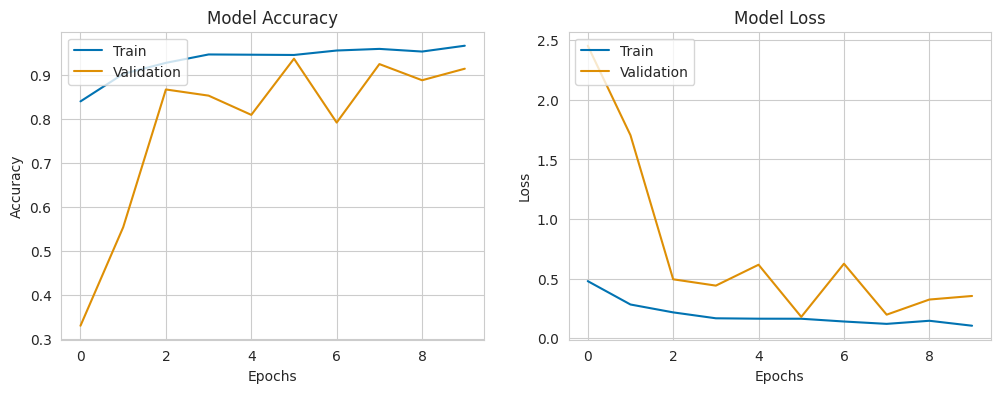

13/41 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

W0000 00:00:1722210235.603688      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step


W0000 00:00:1722210245.057689      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


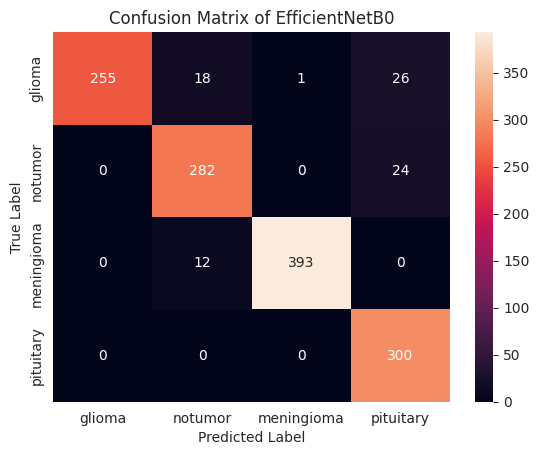

Training ResNet50...
Epoch 1/10
  2/322 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.4219 - loss: 1.8893   

W0000 00:00:1722210311.344018      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


162/322 ━━━━━━━━━━━━━━━━━━━━ 40s 251ms/step - accuracy: 0.6435 - loss: 1.4300

W0000 00:00:1722210351.711000      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.6908 - loss: 1.1698

W0000 00:00:1722210370.969512      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


322/322 ━━━━━━━━━━━━━━━━━━━━ 130s 203ms/step - accuracy: 0.6910 - loss: 1.1687 - val_accuracy: 0.2587 - val_loss: 2.0622
Epoch 2/10


W0000 00:00:1722210376.449806      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


322/322 ━━━━━━━━━━━━━━━━━━━━ 25s 75ms/step - accuracy: 0.8347 - loss: 0.4902 - val_accuracy: 0.2605 - val_loss: 6.5105
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 24s 73ms/step - accuracy: 0.8728 - loss: 0.3539 - val_accuracy: 0.5105 - val_loss: 2.7126
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 24s 74ms/step - accuracy: 0.8879 - loss: 0.3128 - val_accuracy: 0.4283 - val_loss: 10.0210
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 24s 74ms/step - accuracy: 0.9046 - loss: 0.2606 - val_accuracy: 0.8706 - val_loss: 0.3452


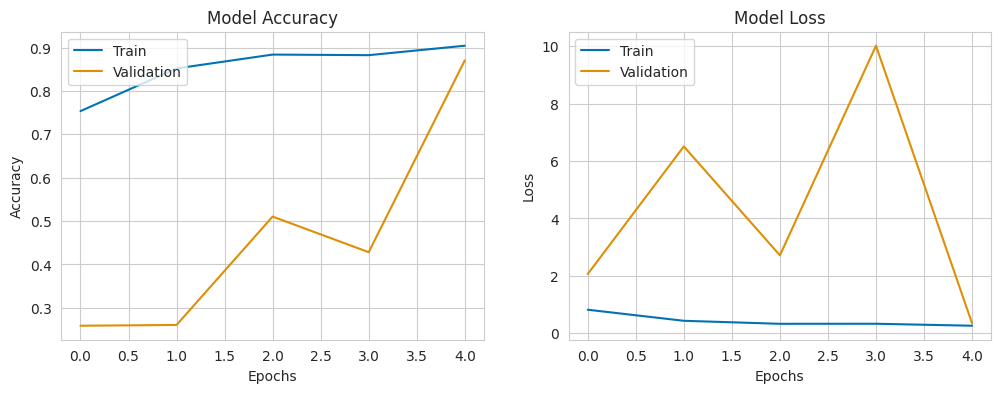

 7/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step

W0000 00:00:1722210478.898868      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 201ms/step


W0000 00:00:1722210486.924189      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


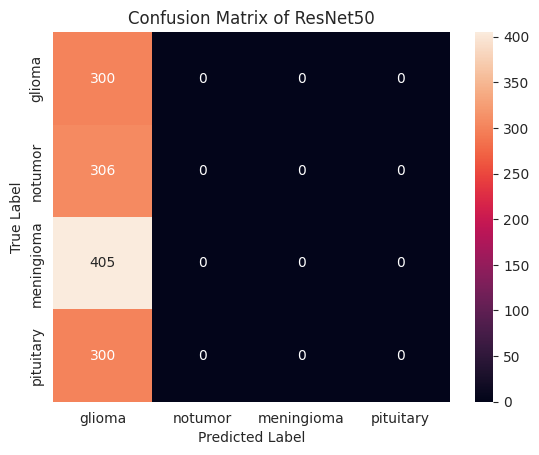

Training VGG16...
Epoch 1/10
  2/322 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.3750 - loss: 2.1544   

W0000 00:00:1722210517.686414      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


322/322 ━━━━━━━━━━━━━━━━━━━━ 110s 254ms/step - accuracy: 0.2852 - loss: 1.4332 - val_accuracy: 0.2395 - val_loss: 1.3884
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 25s 77ms/step - accuracy: 0.2721 - loss: 1.3851 - val_accuracy: 0.2622 - val_loss: 1.3900
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 41s 77ms/step - accuracy: 0.2837 - loss: 1.3822 - val_accuracy: 0.2622 - val_loss: 1.3874
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 25s 77ms/step - accuracy: 0.2799 - loss: 1.3843 - val_accuracy: 0.2622 - val_loss: 1.3898
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 41s 77ms/step - accuracy: 0.2791 - loss: 1.3848 - val_accuracy: 0.2622 - val_loss: 1.3902


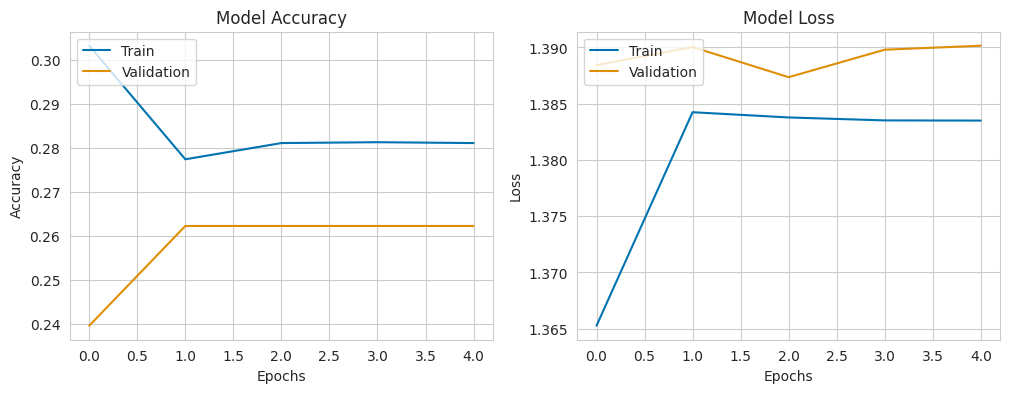

41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 419ms/step


W0000 00:00:1722210750.500599      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


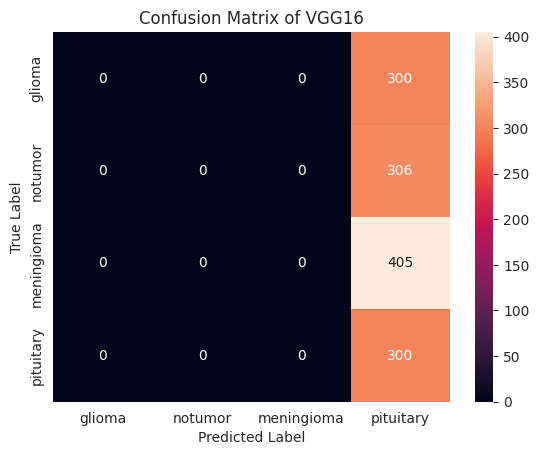

In [ ]:
for model_name, base_model in zip(model_names, base_models):
    print(f"Training {model_name}...")
    model = build_model(base_model, num_classes)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                        validation_data=(X_val, y_val),
                        epochs=epoch, verbose=1, callbacks=[early_stopping])

    # Plotting the training and validation loss and accuracy
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plotting the Confusion Metrics of the Models
    y_true = np.argmax(y_test, axis=1)
    y_pred = np.argmax(model.predict(X_test), axis=1)
    heatmap = sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix of {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Storing the results of Accuracy, F1-Score, Precision and Recall
    report = classification_report(y_true, y_pred, output_dict=True)
    results["Model"].append(model_name)
    results["Accuracy"].append(report['accuracy'])
    results["F1-Score"].append(report['weighted avg']['f1-score'])
    results["Precision"].append(report['weighted avg']['precision'])
    results["Recall"].append(report['weighted avg']['recall'])

    # Saving the models
    model_save_path = os.path.join( '/kaggle/working/', f'{model_name}.h5')
    model.save(model_save_path)

In [ ]:
# Converting the results into a dataframe
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,F1-Score,Precision,Recall
0,EfficientNetB0,0.938215,0.938422,0.944082,0.938215
1,ResNet50,0.228833,0.085226,0.052365,0.228833
2,VGG16,0.228833,0.085226,0.052365,0.228833


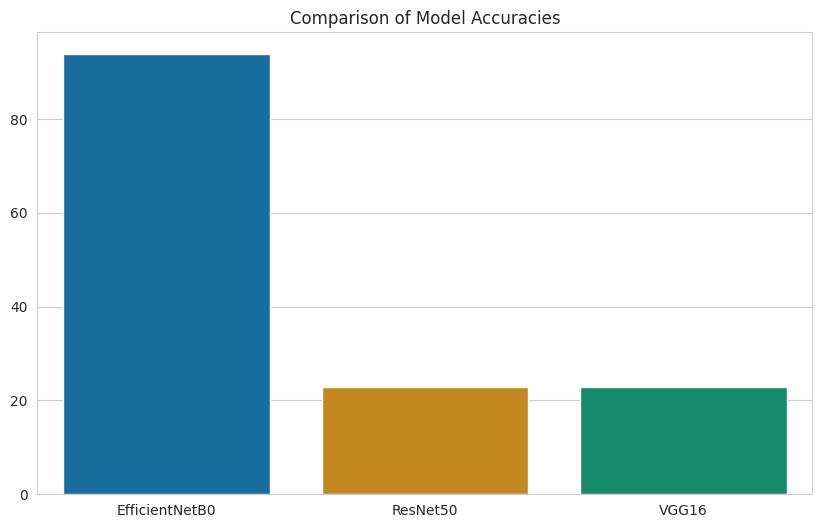

In [ ]:
# Convert accuracy to percentage
results_df['Accuracy'] = results_df['Accuracy'] * 100

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)

# Adding labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Comparison of Model Accuracies')
plt.show()

## Conclusion and Future Work
The ideal model for the classification of brain tumour from the MRI Images is the EfficientNetB0 model achieving an accuracy score of about 93%. Looking at the Model accuracy and model loss graphs this model had run for the highest number of epochs and had generalised the data better than the other models which is reflected on it's confusion metrix and classification report where it had less error of missclassification as it also had higer Precision, Recall and F1-Scores.

### Future Work
One of the major limitation of this project was the lack of access to a GPU. For this reason the epoch and batch sizes were chosen to spped up the training process and the project was conducted while accessing a time-limited Kaggle GPU. As a future extension of this work it would be ideal to train more models with greater epoch sizes to see which model performs better, then save the best model and build an application for Clinical Professionals to detect images with Tumour.